<a href="https://colab.research.google.com/github/suajeong52/collapsible_tube/blob/main/sua_collapsibletube(relu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sciann

     |████████████████████████████████| 174 kB 5.3 MB/s 
     |████████████████████████████████| 460.3 MB 8.9 kB/s 
     |████████████████████████████████| 561 kB 31.1 MB/s 
     |████████████████████████████████| 14.8 MB 32.8 MB/s 
     |████████████████████████████████| 1.2 MB 36.4 MB/s 
     |████████████████████████████████| 132 kB 48.5 MB/s 
     |████████████████████████████████| 462 kB 48.3 MB/s 
     |████████████████████████████████| 4.0 MB 31.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=6d4befb411b040b12e2cda72d2a8195ed59ee11e6e2bfe49d077a8652cd23b7f
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existin

In [2]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt  
from numpy import pi
from sciann.utils.math import diff, sign, sin, sqrt, pow

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



In [3]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [x,t], 8*[20], 'relu')
A = sn.Functional('A', [x,t], 8*[20], 'relu')

In [4]:
L1 = diff(A, t) + u*diff(A,x) + A * diff(u, x) 

In [5]:
rho = 1
beta =200

L2 = diff(u, t) + u*diff(u,x) + beta/(2*rho*sn.pow(A*A+0.01,0.25) ) * diff(A, x, order=1)

In [6]:
TOL = 0.001
T = 10
omega = 2*np.pi/T
C1 = (1-sign(t - TOL)) * (u -0)
C2 = (1-sign(t - TOL)) * (A-1)
C3 = (1-sign(x - TOL)) * (u -sin(omega*t))

In [7]:
m = sn.SciModel([x, t], [L1,L2, C1, C2, C3])

In [8]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 50, 100), 
    np.linspace(0, 120, 100)
)

In [9]:
h = m.train([x_data, t_data], 5*['zero'], learning_rate=0.0005, epochs=2000, verbose=1)


Total samples: 10000 
Batch size: 64 
Total batches: 157 

Epoch 1/2000
157/157 [==============================] - 13s 43ms/step - batch: 78.0000 - size: 63.6943 - loss: 6.6300 - add_2_loss: 7.3550e-04 - add_5_loss: 6.5560 - mul_7_loss: 0.0022 - mul_8_loss: 0.0517 - mul_10_loss: 0.0205 - lr: 5.0000e-04 - time: 13.3650
Epoch 2/2000
157/157 [==============================] - 8s 49ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.1307 - add_2_loss: 9.7239e-05 - add_5_loss: 0.0837 - mul_7_loss: 1.1998e-05 - mul_8_loss: 0.0260 - mul_10_loss: 0.0209 - lr: 5.0000e-04 - time: 7.6762
Epoch 3/2000
157/157 [==============================] - 8s 53ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.1876 - add_2_loss: 7.5414e-05 - add_5_loss: 0.1425 - mul_7_loss: 8.0692e-06 - mul_8_loss: 0.0241 - mul_10_loss: 0.0208 - lr: 5.0000e-04 - time: 8.2514
Epoch 4/2000
157/157 [==============================] - 8s 49ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.2448 - add_2_loss: 1.2108e-04 - add_5_los

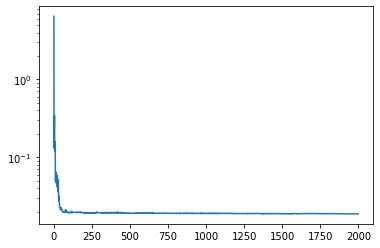

In [10]:
plt.semilogy(h.history['loss'])

In [11]:
h.history.keys()

dict_keys(['loss', 'add_2_loss', 'add_5_loss', 'mul_7_loss', 'mul_8_loss', 'mul_10_loss', 'lr', 'time'])

<function matplotlib.pyplot.show>

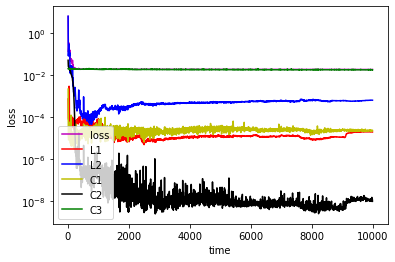

In [12]:
time = np.cumsum(h.history['time'])
plt.semilogy(time, h.history['loss'],'m')
plt.semilogy(time, h.history['add_2_loss'],'r')
plt.semilogy(time, h.history['add_5_loss'],'b')
plt.semilogy(time, h.history['mul_7_loss'],'y')
plt.semilogy(time, h.history['mul_8_loss'],'k')
plt.semilogy(time, h.history['mul_10_loss'],'g')
plt.legend(['loss', 'L1','L2','C1','C2', 'C3'])
plt.xlabel('time')
plt.ylabel('loss')
plt.show